In [42]:
import numpy as np
import math as math
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


Text(0.5, 1.0, 'logistic regresion')

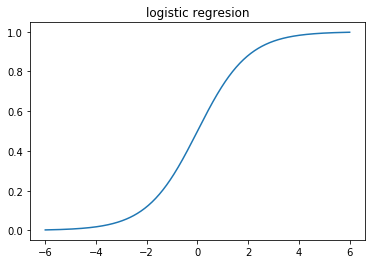

In [43]:
def logistic(t):
    return(1.0/(1+math.exp((-1.0)*t)))
t=np.linspace(-6,6,500)
y=np.array([logistic(ele)for ele in t])
plt.plot(t,y)
plt.title("logistic regresion")

In [44]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [45]:
def check_affair(x):
    if(x != 0):
        return 1
    else:
        return 0

In [46]:
df["had_affair"]=df["affairs"].apply(check_affair)

In [48]:
df
Y=df.had_affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [49]:
df.groupby("had_affair").median()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,5.0,27.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000
1,4.0,27.0,9.0,2.0,2.0,14.0,3.0,4.0,1.217391


In [50]:
df.groupby("had_affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


C:\Users\tanya jha\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: 'NoneType' object is not iterable

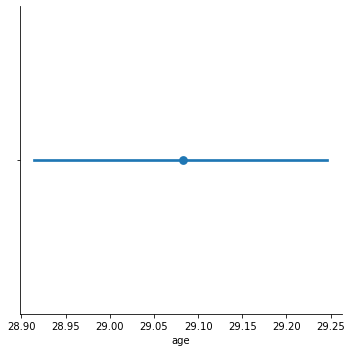

In [51]:
sns.factorplot('age',data=df,hue="had_affair",palatte="coolwarm")

In [ ]:
occu_dummies=pd.get_dummies(df["occupation"])
hus_occ_dummies=pd.get_dummies(df["occupation_husb"])
occu_dummies.head()


In [52]:
hus_occ_dummies.head()

,hus_occ1,hus_occ2,hus_occ3,hus_occu4,hus_occ5,hus_occu6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [53]:
occu_dummies.columns=['occ1','occ2','occ3','occu4','occ5','occu6']
occu_dummies.head()

,occ1,occ2,occ3,occu4,occ5,occu6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [54]:
hus_occ_dummies.columns=['hus_occ1','hus_occ2','hus_occ3','hus_occu4','hus_occ5','hus_occu6']
hus_occ_dummies.head()


,hus_occ1,hus_occ2,hus_occ3,hus_occu4,hus_occ5,hus_occu6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [55]:
X=df.drop(['occupation','occupation_husb','had_affair'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [56]:
df=pd.concat([occu_dummies,hus_occ_dummies],axis=1)
df.head()

,occ1,occ2,occ3,occu4,occ5,occu6,hus_occ1,hus_occ2,hus_occ3,hus_occu4,hus_occ5,hus_occu6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [57]:
df=pd.concat([X,df],axis=1)
df.head()


,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occu4,occ5,occu6,hus_occ1,hus_occ2,hus_occ3,hus_occu4,hus_occ5,hus_occu6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [106]:
X=df.drop(['occ1','hus_occ1'],axis=1)
X.head()


,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occu4,occ5,occu6,hus_occ2,hus_occ3,hus_occu4,hus_occ5,hus_occu6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [107]:
Y=np.ravel(Y)

In [139]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [140]:
algo1=LogisticRegression()

In [141]:
algo1.fit(X,Y)

C:\Users\tanya jha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
algo1.score(X,Y)

0.9791077599748664

In [143]:
algo1.score(X_test,Y_test)


0.9774869109947644

In [144]:
algo1.score(X_train,Y_train)

0.979802513464991

In [145]:
Y_pred=algo1.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:

Y_pred=np.ravel(Y_pred)
Y_pred.shape

(1910,)

In [147]:
Y_test.shape


(1910,)

In [148]:
Y.mean()
# this is the mean of the woman having affairs 

0.3224945020420987

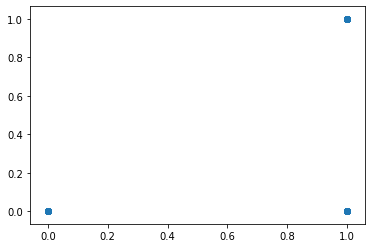

In [149]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.show()

In [136]:
coeff_dff=pd.DataFrame(zip(X.columns,np.transpose(algo1.coef_)))

In [150]:
coeff_dff

,0,1
0,rate_marriage,[-0.41773838831750765]
1,age,[-0.09238892102342657]
2,yrs_married,[0.16710800765464917]
3,children,[0.06369236970450601]
4,religious,[-0.25519374528995936]
5,educ,[0.005174843142716965]
6,affairs,[16.347914738397403]
7,occ2,[-0.17563323178450993]
8,occ3,[0.009229713828692122]
9,occu4,[-0.025420239694203674]


In [151]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3)
X_train.shape
Y_train.shape

(4456,)

In [152]:
algo2=LogisticRegression()
algo2.fit(X_train,Y_train)

C:\Users\tanya jha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
Y_pred2=algo2.predict(X_test)

In [154]:
algo2.score(X_test,Y_test)

0.9785340314136126

In [155]:
algo2.score(X_train,Y_train)

0.9762118491921006

In [156]:
Y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
print(metrics.accuracy_score(Y_test,Y_pred2))

0.9785340314136126
